# Data Science Programming Fall 19 Assignment 2

<b><i>This Assignment focuses on data preprocessing and model building. Load the "bank" dataset and predict the "subscription status" using a stochastic gradient descent classifier. Make a stratified 80-20 split based on target to ensure there are no biases in the dataset. Calculate the confusion matrix, precision, recall, accuracy, f1 score, cross validation scores for the models. Also, plot ROC Curve for the model. Provide your intepretations based on these metrics.</i></b>

<ul>
    <li>Import the required libraries</li>
    <li>Make an 80-20 stratified split based on the target data</li>
    <li>Preprocess the data (Encode the  categorical features and Standardize the numerical features)</li>
    <li>Build a stochastic gradient descent classifier, train the model and make predictions using it</li>
    <li>Evaluate your model based on the various metrics stated above</li>
    <li>Plot ROC curve and provide insights</li>
</ul>

In [410]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,precision_score,recall_score,f1_score,roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [440]:
bank=pd.read_csv("bank.csv",header='infer')

In [427]:
target = bank.pop('y')
target = target.to_frame(name="y")

In [428]:
X_train, X_test, y_train, y_test = train_test_split(bank, target, test_size=0.2, random_state=42,stratify=target)

In [429]:
y_train['y'] = y_train['y'].astype('category')
y_train['y'] = y_train['y'].cat.codes 

y_test['y'] = y_test['y'].astype('category')
y_test['y'] = y_test['y'].cat.codes 

In [430]:
def encode(df):
    cat_cols=df[["job","marital","education","default","housing","loan","month"]].columns.values.tolist()
    df = pd.get_dummies(df, columns=cat_cols, prefix=cat_cols)
    return df

In [431]:
X_train = encode(X_train)
X_test = encode(X_test)

In [432]:
scaler = StandardScaler()

In [433]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [434]:
sgd=SGDClassifier(loss='hinge', alpha=0.0001, random_state=42, eta0=0.1)

In [435]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.1, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [436]:
y_predicted=sgd.predict(X_test)

In [437]:
confusion_matrix(y_test, y_predicted)

array([[686, 115],
       [ 48,  56]], dtype=int64)

In [438]:
print('Stochastic Gradient Descent Classifier')
print('Precision Score: '+ str(round(precision_score(y_test, y_predicted),2)))
print('Recall Score: '+ str(round(recall_score(y_test,y_predicted),2)))
print('Accuracy Score: '+ str(round(accuracy_score(y_test,y_predicted),2)))
print('F1 Score: '+ str(round(f1_score(y_test, y_predicted, average='weighted'),2)))
print('Cross validation Scores: ' + str(cross_val_score(sgd,X_train,y_train,cv=3,scoring="accuracy")))

Stochastic Gradient Descent Classifier
Precision Score: 0.33
Recall Score: 0.54
Accuracy Score: 0.82
F1 Score: 0.84
Cross validation Scores: [0.86981758 0.88298755 0.8746888 ]


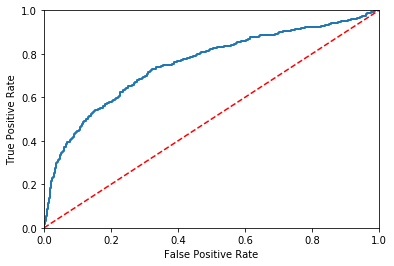

In [439]:
y_scores=cross_val_predict(sgd,X_train,y_train,cv=3,method="decision_function")
fpr,tpr,thresholds=roc_curve(y_train,y_scores, pos_label=1)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()